In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1

Three ways to convert similarities to distance: <br> 1. $distance = 1 - similarity$ <br> 2. $distance = \frac{1} {similarity} $ <br> 2. $distance = 1 - similarity^{2}$ <br> I would choose to use the first method in my code because its output is in the range [0,1]. The second method would be difficult to use because there could be really large numbers and the third method is hard to use because there might be negative numbers.

# Question 2 

In [2]:
sports = ["football","baseball","basketball","tennis","softball","canoeing","handball","rugby","hockey","ice hockey",
          "swimming","track","boxing","volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","gymnastics"]

similarities = np.loadtxt(open("Assignment5-similarities.csv", "rb"), delimiter=",", skiprows =1)
distance = 1 - similarities
D = 2
N = distance.shape[0]

def dist(x, y):
    return sum((x-y)**2)**0.5

def stress(m):
    s = 0
    for i in range(N):
        for j in range(N):
            if i < j:
                s += (distance[i][j] - dist(m[i], m[j]))**2
    return s
# print(s)

# Question 3

In [3]:
def gradient(m, i, d, deriv = 0.001):
    curr_s = stress(m)
    distance[i][d] += deriv
    new_s = stress(m)
    diff = new_s - curr_s
    grad = diff/(2*deriv)
    return grad   

# Question 4

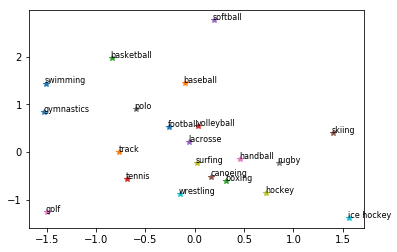

In [4]:
D = 2
N = distance.shape[0]

def compute_gradient(distance):
    com_gradient = np.zeros((N, D))
    for i in range(N):
        for j in range(D):
            com_gradient[i][j] = gradient(distance, i, j)
    return com_gradient

positions = np.random.normal(0, 1, size=(N, D))
s_list = []
for a in range(100):
    s = stress(positions)
    s_list.append(s)
    positions = positions - compute_gradient(positions)*0.04
fig=plt.figure()
ax=fig.add_subplot(111)
for i in range(N):
    ax.plot(positions[i][0], positions[i][1],"*")
    ax.text(positions[i][0]-0.01,positions[i][1]+0.01,sports[i],fontsize=8)
plt.show()    

My intuition seemed correct as the sports with similar skills seems to come together. All sports with ball are close and different sports are far away.

# Question 5

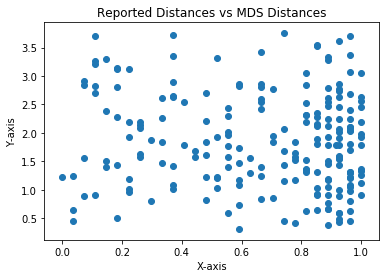

In [5]:
positions = np.random.normal(0.0, 1.0, size=(N, D))
pairwise_dist = np.zeros((len(positions),len(positions)))
for i in range(len(positions)):
    for j in range(len(positions)):
        pairwise_dist[i][j] = dist(positions[i], positions[j])
mds_dist = []
report_dist = []
for i in range((len(sports)):
    for j in range((len(sports)):
        if i < j:
            mds_dist.append(pairwise_dist[i][j])
            report_dist.append(distance[i][j])         
plt.scatter(report_dist, mds_dist)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Reported Distances vs MDS Distances')
plt.show()

The plot is not the best because we cannot distiguish between the different group and a good plot would show the different parts of the data

# Question 6

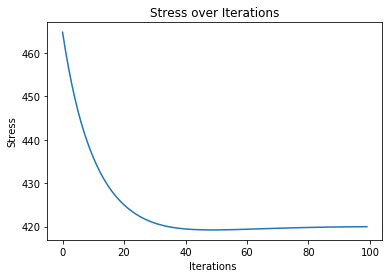

In [6]:
plt.plot([i for i in range(100)], s_list)
plt.xlabel('Iterations ')
plt.ylabel('Stress')
plt.title('Stress over Iterations')
plt.show()

When the graph plateaus, that is when you know thats how many iterations you need because you know the stress won't get lower.

# Question 7

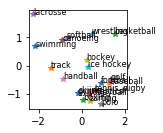

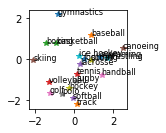

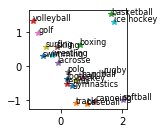

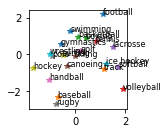

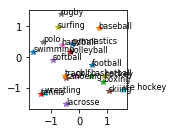

In [7]:
for i in range(5):
    np.random.seed(20190705+i)
    positions = np.random.normal(0.0,1.0,size=(N,D)) 
    for j in range(100):
        positions = positions - compute_gradient(positions)*0.003 
    fig=plt.figure()
    ax = fig.add_subplot(2,3,i+1)
    for i in range(N):
        ax.plot(positions[i][0], positions[i][1],"*")
        ax.text(positions[i][0]-0.01, positions[i][1]+0.01, sports[i])
plt.show()

They are not all the same because they all start from random initial states. Even if stress is 0, the distances for all of the pairs are the same but position might be different. The plots have many local minimum and it cannot reach a global minimum point so the final state is not the same.

# Question 8

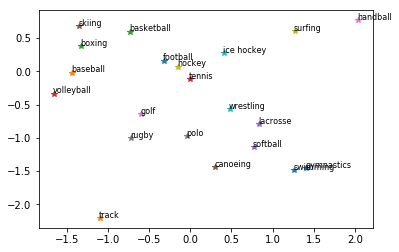

In [9]:
new_pos=np.zeros((N,D))
max_stress=9999
for i in range(5):
    positions = np.random.normal(0.0, 1.0, size=(N, D))
    for j in range(100):
        positions = positions - compute_gradient(positions)*0.003 
    if max_stress > stress(positions):
        max_stress=stress(positions)
        new_pos= positions
fig=plt.figure()
ax=fig.add_subplot(111)
for i in range(N):
    ax.plot(new_pos[i][0],new_pos[i][1],"*")
    ax.text(new_pos[i][0]-0.01, new_pos[i][1]+0.01, sports[i])
plt.show()

The goal is to minimize stress so I would pick the plot with the minimum stress because that means there is less loss so thats the best plot.